BỘ 1

In [108]:
import random
import numpy as np

def generate_data(num_points, seed=999):
    data = []
    noise_interval = 10  # Mỗi 10 điểm có một điểm nhiễu

    # Set random seed for reproducibility
    random.seed(seed)
    np.random.seed(seed)

    # Tạo trung tâm cụm
    center1 = (4, 4)
    center2 = (8, 8)

    for i in range(num_points):
        # Chia dãy thành 2 cụm và xác định trung tâm tương ứng
        if i < num_points // 2:
            center = center1
        else:
            center = center2

        # Tạo nhiễu mỗi 10 điểm
        if i % noise_interval == 0:
            x1 = random.uniform(0, 10)
            x2 = random.uniform(0, 10)
        else:
            # Tạo dữ liệu theo phân phối chuẩn quanh trung tâm cụm
            x1 = np.random.normal(center[0], 1.4)
            x2 = np.random.normal(center[1], 1.4)

        # Giới hạn giá trị x1 và x2 trong khoảng 0-10
        x1 = max(0, min(20, x1))
        x2 = max(0, min(20, x2))

        # Thêm tuple vào dãy
        data.append((i, x1, x2))

    return data

# Sử dụng hàm để tạo dữ liệu với seed=42 để có thể tái tạo
num_points = 400
random_data = generate_data(num_points, seed=999)

# In ra một số dữ liệu để kiểm tra
for point in random_data[:10]:
    print(point)


(0, 7.813468849570297, 0.800656147037001)
(1, 4.1780209815855915, 5.962647235478998)
(2, 4.440740981428637, 2.7981711699149363)
(3, 3.6274117885261337, 3.091539006550179)
(4, 6.192774596513409, 1.07208173314406)
(5, 6.038859289231363, 5.323410781558044)
(6, 3.439718328607179, 4.44131822565296)
(7, 2.4459148323007343, 3.1812498646400176)
(8, 3.736226610305445, 5.1382331086709065)
(9, 3.7741733970190006, 6.241220170977558)


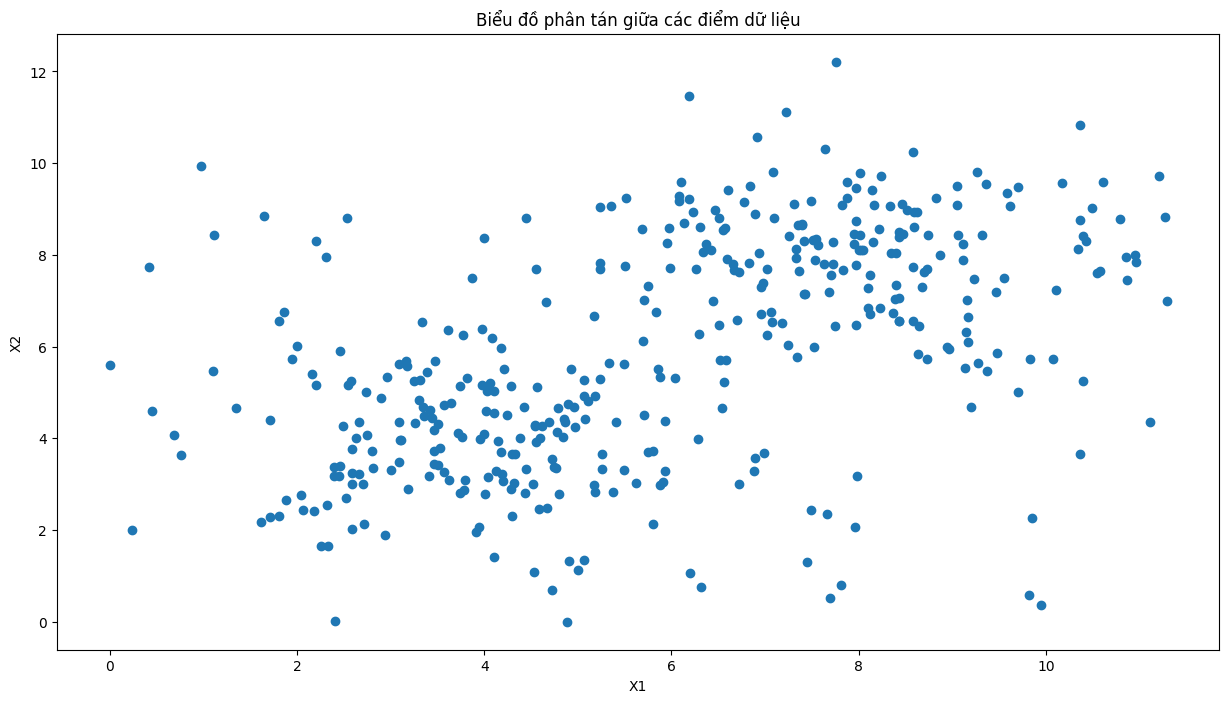

In [170]:
import matplotlib.pyplot as plt

# Extract x1 and x2 from the tuples
x1_values = [point[1] for point in random_data]
x2_values = [point[2] for point in random_data]

# Plot the points
plt.figure(figsize = (15, 8))
plt.scatter(x1_values, x2_values, marker='o', label='Data Points')
plt.title('Biểu đồ phân tán giữa các điểm dữ liệu')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [110]:
# Lưu vào file CSV
import csv
csv_filename = "data.csv"
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Index', 'X1', 'X2'])  # Write header
    csv_writer.writerows(random_data)

print(f"Data saved to {csv_filename}")

Data saved to data.csv


Text(0, 0.5, 'Reachability Distance')

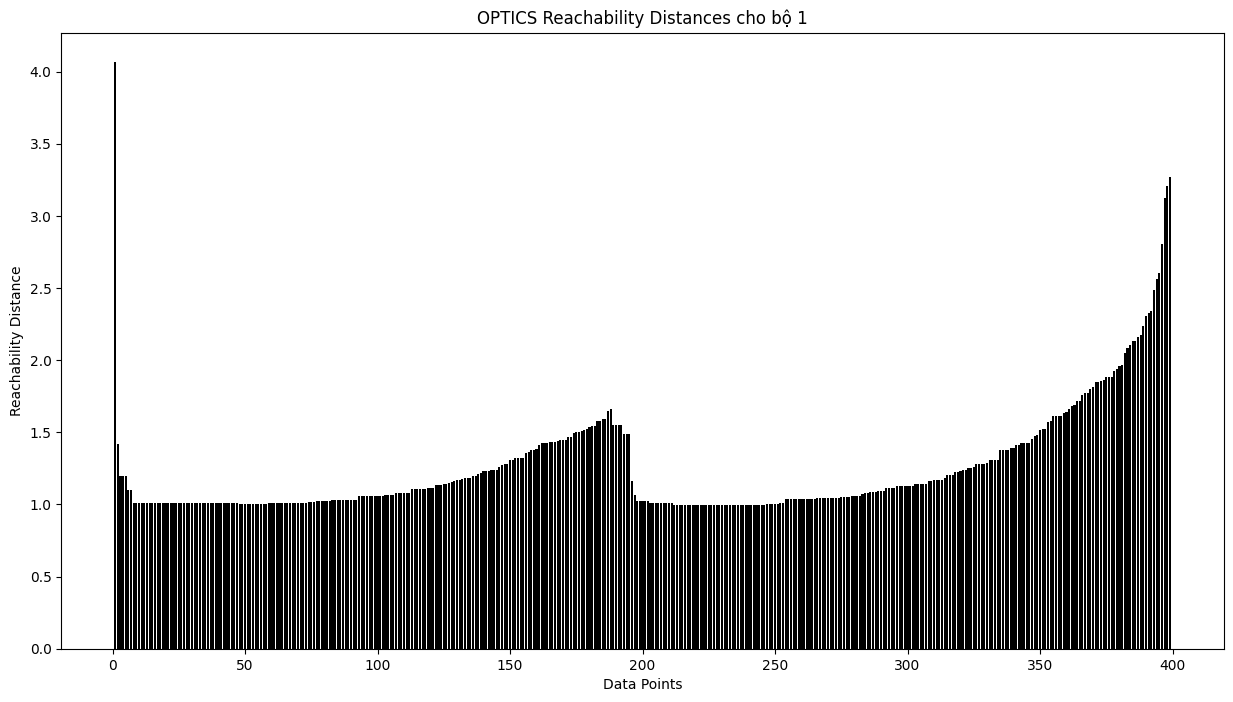

In [171]:
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
import numpy as np

# Extract x1 and x2 from the tuples
X = np.array([(point[1], point[2]) for point in random_data])

# Run OPTICS algorithm
optics_model = OPTICS(eps=1.5, min_samples=50, cluster_method = 'dbscan')
optics_model.fit(X)

# Extract reachability distances and labels
reachability_distances = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_

# Plot the OPTICS result
plt.figure(figsize=(15, 8))
# Bar plot for reachability distances
plt.bar(range(len(reachability_distances)), reachability_distances, color='black')
plt.title('OPTICS Reachability Distances cho bộ 1')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')

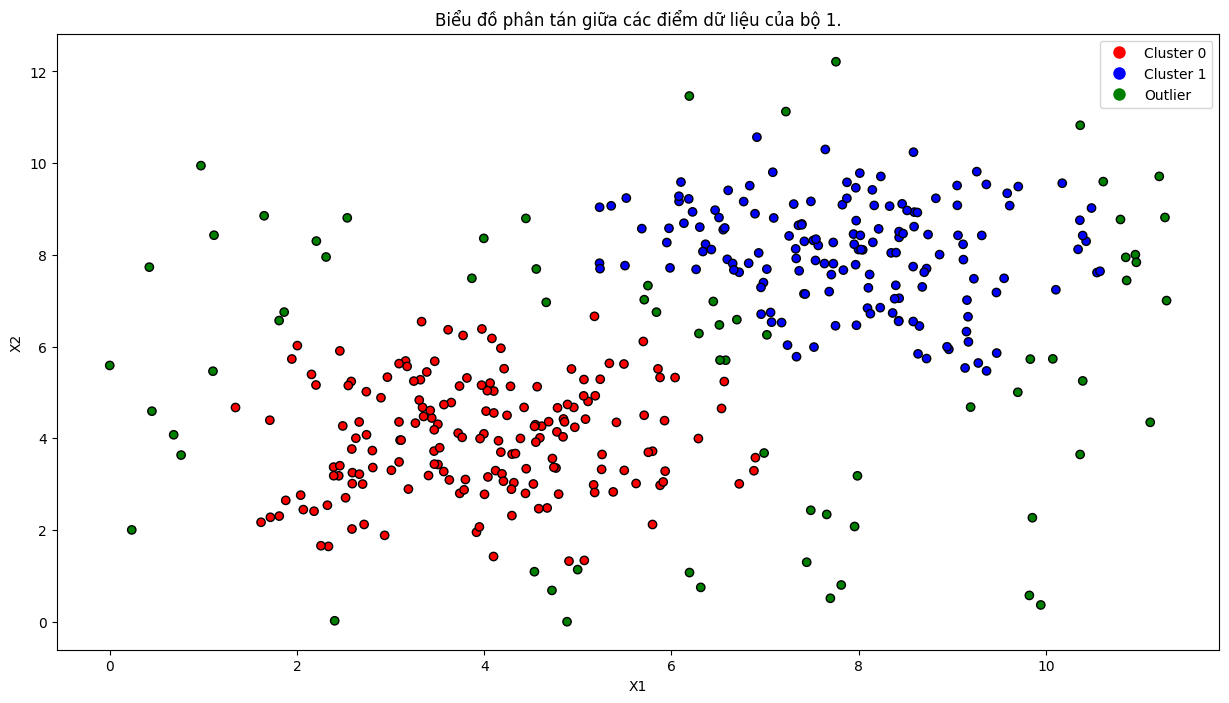

In [174]:
# Create a dictionary to map data points to their corresponding labels
data_labels = {f'Data Point {i}': label for i, label in enumerate(labels)}

# Visualize the assignment of each data point to its label
plt.figure(figsize=(15, 8))
# Define colors based on cluster labels
colors = {0: 'red', 1: 'blue', -1: 'green'}

# Scatter plot with custom colors
scatter = plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in labels], edgecolor='k')
plt.title('Biểu đồ phân tán giữa các điểm dữ liệu của bộ 1.')
plt.xlabel('X1')
plt.ylabel('X2')

# Create a legend for the custom colors
legend_labels = ['Cluster 0', 'Cluster 1', 'Outlier']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10, label=f'Cluster {label}') for label in [0, 1, -1]]
plt.legend(handles=legend_elements, labels=legend_labels)

plt.show()

BỘ 2

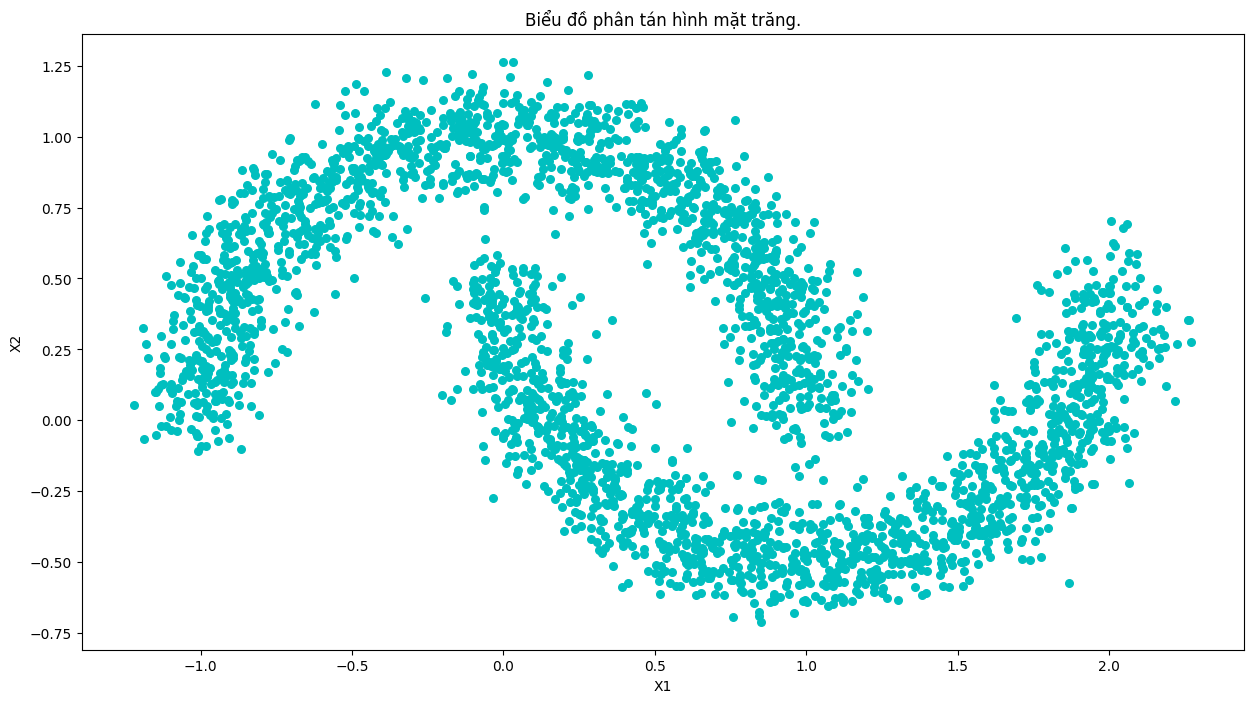

<Figure size 640x480 with 0 Axes>

In [186]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Set random seed for reproducibility
random_seed = 999

X, y = make_moons(n_samples=3000, noise=0.1, random_state=random_seed)

plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], s=30, color='c')
plt.title('Biểu đồ phân tán hình mặt trăng.')
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()
plt.clf()


Text(0, 0.5, 'Reachability Distance')

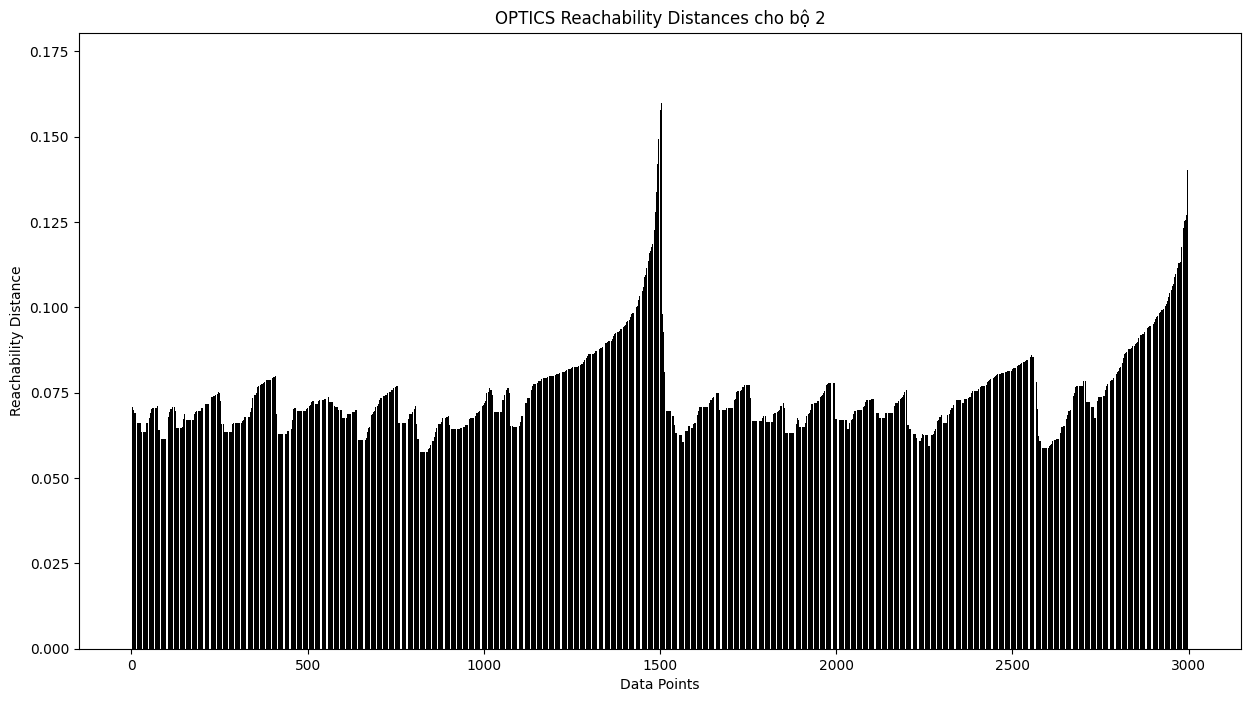

In [187]:
# Run OPTICS algorithm
optics_model = OPTICS(eps = 0.15,min_samples=30, cluster_method = 'dbscan')
optics_model.fit(X)

# Extract reachability distances and labels
reachability_distances = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_

# Plot the OPTICS result
plt.figure(figsize=(15, 8))
# Bar plot for reachability distances
plt.bar(range(len(reachability_distances)), reachability_distances, color='black')
plt.title('OPTICS Reachability Distances cho bộ 2')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')

In [191]:
reachability_distances

array([       inf, 0.09632849, 0.08570143, ..., 0.14038408, 0.15001375,
       0.17187579])

In [188]:
print(labels)

[0 1 0 ... 1 1 1]


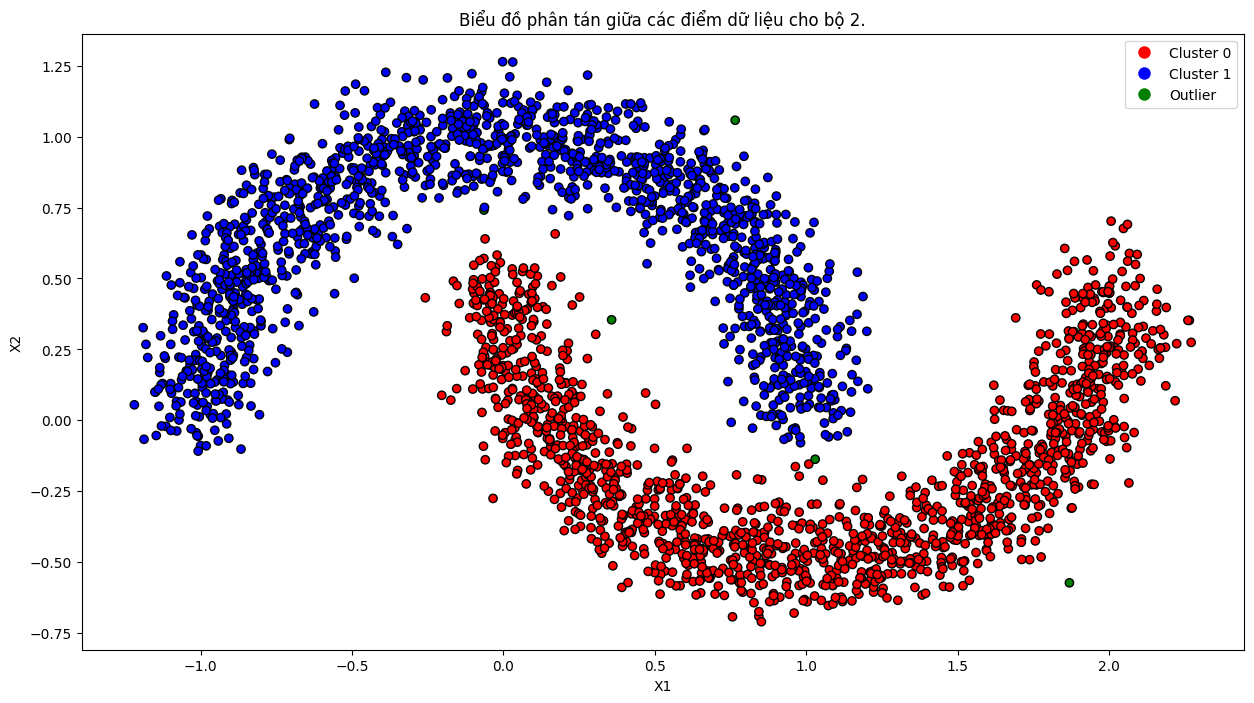

In [189]:
# Create a dictionary to map data points to their corresponding labels
data_labels = {f'Data Point {i}': label for i, label in enumerate(labels)}

# Visualize the assignment of each data point to its label
plt.figure(figsize=(15, 8))
# Define colors based on cluster labels
colors = {0: 'red', 1: 'blue', -1: 'green'}

# Scatter plot with custom colors
scatter = plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in labels], edgecolor='k')
plt.title('Biểu đồ phân tán giữa các điểm dữ liệu cho bộ 2.')
plt.xlabel('X1')
plt.ylabel('X2')

# Create a legend for the custom colors
legend_labels = ['Cluster 0', 'Cluster 1', 'Outlier']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10, label=f'Cluster {label}') for label in [0, 1, -1]]
plt.legend(handles=legend_elements, labels=legend_labels)

plt.show()

In [156]:
# Create a DataFrame from the generated data
import pandas as pd
df = pd.DataFrame(data={'X1': X[:, 0], 'X2': X[:, 1], 'y': y})

# Save the DataFrame to a CSV file
df.to_csv('data_moon.csv', index=False)

print("Data saved to data_moon.csv")

Data saved to data_moon.csv


BỘ 3

In [122]:
import torch
from torchvision import datasets, transforms
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Download FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
fashion_mnist_train = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)

# Flatten the images and organize by class (only for classes 1 and 4)
selected_classes = [1, 4]
flattened_images = {i: [] for i in selected_classes}  # Create a dictionary to store flattened images by class

for image, label in fashion_mnist_train:
    if label in selected_classes and len(flattened_images[label]) <= 30:  # Limit to 30 images per class
        flattened_images[label].append(image.numpy())
    else:
        continue

# Convert lists of NumPy arrays to PyTorch tensors
for label in flattened_images:
    flattened_images[label] = torch.stack([torch.from_numpy(img) for img in flattened_images[label]])

# Reshape the tensors to 2D (num_samples x num_features)
for label in flattened_images:
    flattened_images[label] = flattened_images[label].view(flattened_images[label].size(0), -1)

# Concatenate tensors for all selected classes
all_flattened_images = torch.cat([flattened_images[label] for label in flattened_images], dim=0)


100%|██████████| 26421880/26421880 [00:02<00:00, 9244690.83it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 135383.88it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2513891.54it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11602513.16it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [178]:
# Use OPTICS for clustering and create a reachability plot
optics_model = OPTICS(eps=0.17, min_samples=27,
                      metric = 'cosine',
                      cluster_method = 'dbscan')
optics_labels = optics_model.fit_predict(all_flattened_images)

Text(0, 0.5, 'Reachability Distance')

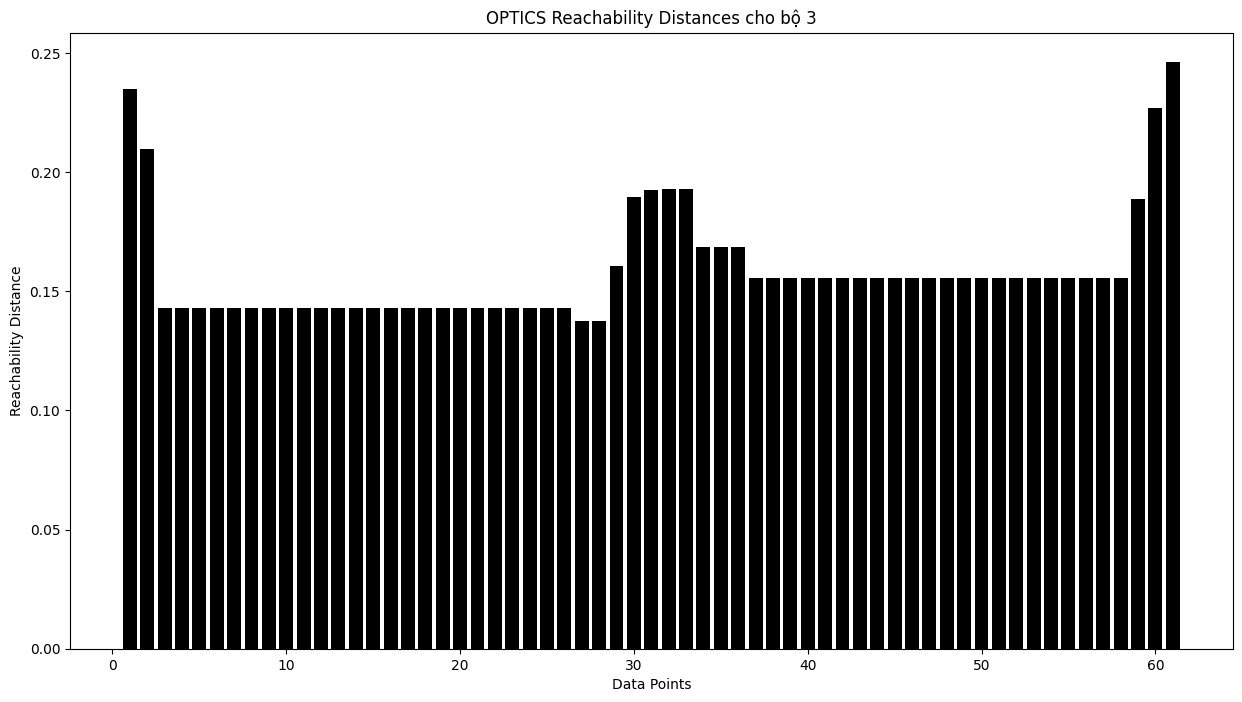

In [179]:
# Extract reachability distances and labels
reachability_distances = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_

# Plot the OPTICS result
plt.figure(figsize=(15, 8))
# Bar plot for reachability distances
plt.bar(range(len(reachability_distances)), reachability_distances, color='black')
plt.title('OPTICS Reachability Distances cho bộ 3')
plt.xlabel('Data Points')
plt.ylabel('Reachability Distance')

In [185]:
labels

array([-1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1])